지하철 데이터:
https://topis.seoul.go.kr/refRoom/openRefRoom_3_4.do



In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [83]:
total = pd.read_csv("totaltraffic.csv")
climate = pd.read_csv("climate_1.csv")

In [84]:
climate = climate.fillna(0)


In [85]:
total = total.drop('index', axis = 1)

In [86]:
lst = total['date']
for i in range(len(lst)):
    lst[i] = lst[i].split(' ')[0]
lst
total['date'] = lst

<ipython-input-86-67f080f552db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lst[i] = lst[i].split(' ')[0]


In [87]:
total

,total,general,kid,teen,old,date,holiday,weekend
0,6485597,5229394,43836,201787,838741,2019-07-01,0,0
1,6647129,5361085,54487,213144,844516,2019-07-02,0,0
2,6739548,5419814,67762,224711,852815,2019-07-03,0,0
3,6761396,5445891,64650,233703,843691,2019-07-04,0,0
4,7028077,5670496,79808,278693,825155,2019-07-05,0,0
...,...,...,...,...,...,...,...,...
480,5771765,4751583,37025,138815,702403,2020-10-27,0,0
481,5834483,4806248,38890,144773,701544,2020-10-28,0,0
482,5818988,4799650,38179,142880,696976,2020-10-29,0,0
483,6035572,4986971,44370,158234,702710,2020-10-30,0,0


In [88]:
df = pd.merge(total, climate, how='right', left_on='date', right_on='date')

In [89]:
df

,total,general,kid,teen,old,date,holiday,weekend,temp,rain,humid,snow
0,6485597.0,5229394.0,43836.0,201787.0,838741.0,2019-07-01,0.0,0.0,24.034783,0.0,63.173913,0.0
1,6647129.0,5361085.0,54487.0,213144.0,844516.0,2019-07-02,0.0,0.0,24.287500,0.0,63.166667,0.0
2,6739548.0,5419814.0,67762.0,224711.0,852815.0,2019-07-03,0.0,0.0,24.175000,0.0,65.333333,0.0
3,6761396.0,5445891.0,64650.0,233703.0,843691.0,2019-07-04,0.0,0.0,25.354167,0.0,58.625000,0.0
4,7028077.0,5670496.0,79808.0,278693.0,825155.0,2019-07-05,0.0,0.0,27.295833,0.0,45.541667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
392,5495591.0,4542491.0,35657.0,133365.0,649327.0,2020-07-27,0.0,0.0,24.283333,2.2,85.875000,0.0
393,5650670.0,4667603.0,39303.0,139813.0,667026.0,2020-07-28,0.0,0.0,24.308333,0.4,84.458333,0.0
394,5521934.0,4610516.0,41044.0,143696.0,597596.0,2020-07-29,0.0,0.0,23.637500,50.1,95.416667,0.0
395,5629053.0,4645554.0,44927.0,148949.0,653683.0,2020-07-30,0.0,0.0,25.445833,0.1,86.041667,0.0


In [91]:
df = df.set_index('date')
df

,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
date,,,,,,,,,,,
2019-07-01,6485597.0,5229394.0,43836.0,201787.0,838741.0,0.0,0.0,24.034783,0.0,63.173913,0.0
2019-07-02,6647129.0,5361085.0,54487.0,213144.0,844516.0,0.0,0.0,24.287500,0.0,63.166667,0.0
2019-07-03,6739548.0,5419814.0,67762.0,224711.0,852815.0,0.0,0.0,24.175000,0.0,65.333333,0.0
2019-07-04,6761396.0,5445891.0,64650.0,233703.0,843691.0,0.0,0.0,25.354167,0.0,58.625000,0.0
2019-07-05,7028077.0,5670496.0,79808.0,278693.0,825155.0,0.0,0.0,27.295833,0.0,45.541667,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,5495591.0,4542491.0,35657.0,133365.0,649327.0,0.0,0.0,24.283333,2.2,85.875000,0.0
2020-07-28,5650670.0,4667603.0,39303.0,139813.0,667026.0,0.0,0.0,24.308333,0.4,84.458333,0.0
2020-07-29,5521934.0,4610516.0,41044.0,143696.0,597596.0,0.0,0.0,23.637500,50.1,95.416667,0.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


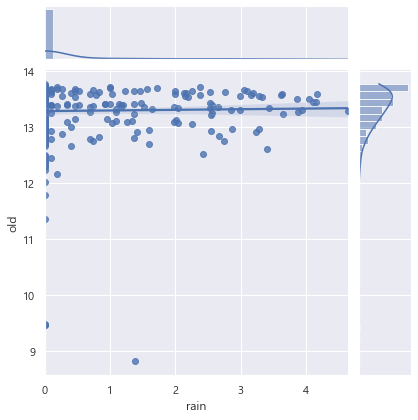

In [110]:
sns.set(rc={'figure.figsize':(20,15)})
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

j = sns.jointplot('rain', 'old', data = df, kind = 'reg')

In [92]:
#로그 스케일링
df = df.applymap(lambda x: np.log(x+1))
df

<ipython-input-92-601a16f27442>:2: RuntimeWarning: invalid value encountered in log
  df = df.applymap(lambda x: np.log(x+1))


,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
date,,,,,,,,,,,
2019-07-01,15.685095,15.469806,10.688233,12.214973,13.639658,0.0,0.0,3.220266,0.000000,4.161597,0.0
2019-07-02,15.709696,15.494677,10.905736,12.269728,13.646520,0.0,0.0,3.230310,0.000000,4.161484,0.0
2019-07-03,15.723504,15.505572,11.123772,12.322575,13.656299,0.0,0.0,3.225851,0.000000,4.194693,0.0
2019-07-04,15.726740,15.510372,11.076759,12.361811,13.645543,0.0,0.0,3.271626,0.000000,4.088075,0.0
2019-07-05,15.765424,15.550787,11.287392,12.537870,13.623328,0.0,0.0,3.342715,0.000000,3.840348,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,15.519457,15.328986,10.481729,11.800853,13.383693,0.0,0.0,3.230145,1.163151,4.464470,0.0
2020-07-28,15.547285,15.356156,10.579082,11.848068,13.410586,0.0,0.0,3.231134,0.336472,4.448029,0.0
2020-07-29,15.524239,15.343851,10.622424,11.875462,13.300672,0.0,0.0,3.204270,3.933784,4.568679,0.0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


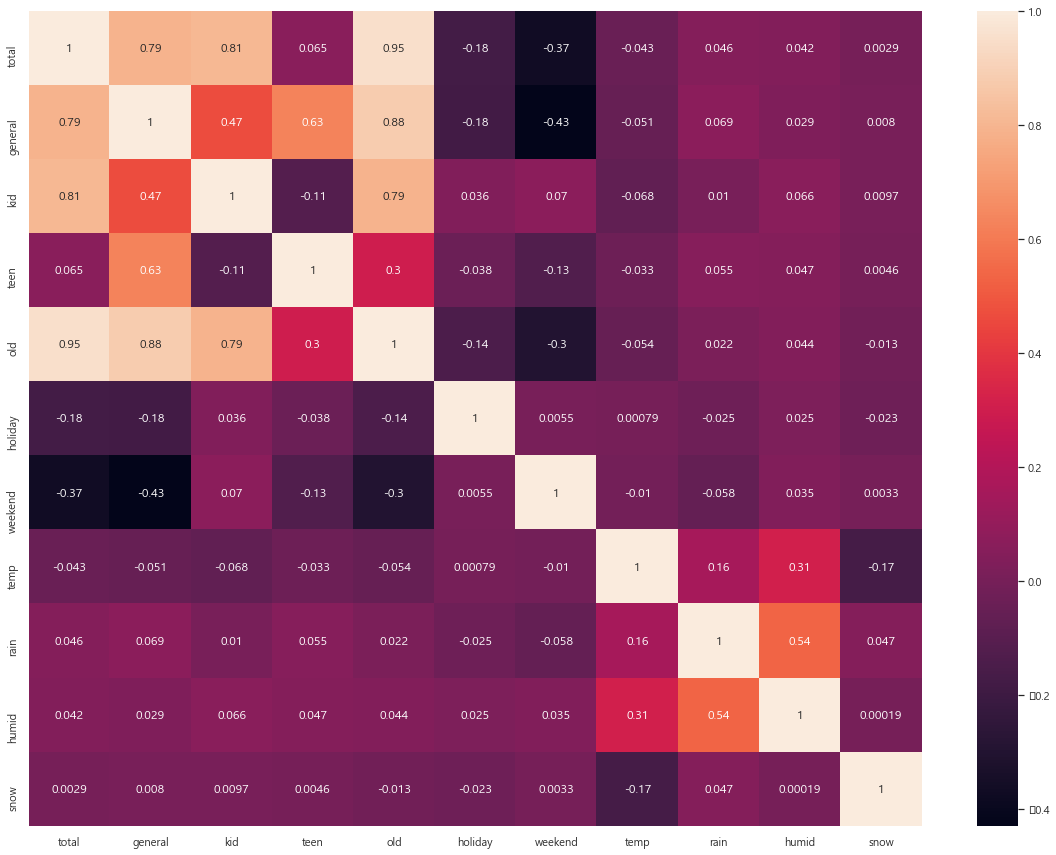

In [93]:
sns.set(rc={'figure.figsize':(20,15)})
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [94]:
df.to_csv("logTransformed_1.csv", index = False)

In [95]:
df = pd.read_csv("logTransformed_1.csv")
df

,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
0,15.685095,15.469806,10.688233,12.214973,13.639658,0.0,0.0,3.220266,0.000000,4.161597,0.0
1,15.709696,15.494677,10.905736,12.269728,13.646520,0.0,0.0,3.230310,0.000000,4.161484,0.0
2,15.723504,15.505572,11.123772,12.322575,13.656299,0.0,0.0,3.225851,0.000000,4.194693,0.0
3,15.726740,15.510372,11.076759,12.361811,13.645543,0.0,0.0,3.271626,0.000000,4.088075,0.0
4,15.765424,15.550787,11.287392,12.537870,13.623328,0.0,0.0,3.342715,0.000000,3.840348,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392,15.519457,15.328986,10.481729,11.800853,13.383693,0.0,0.0,3.230145,1.163151,4.464470,0.0
393,15.547285,15.356156,10.579082,11.848068,13.410586,0.0,0.0,3.231134,0.336472,4.448029,0.0
394,15.524239,15.343851,10.622424,11.875462,13.300672,0.0,0.0,3.204270,3.933784,4.568679,0.0
395,15.543452,15.351421,10.712816,11.911366,13.390379,0.0,0.0,3.275099,0.095310,4.466387,0.0


In [96]:
df

,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
0,15.685095,15.469806,10.688233,12.214973,13.639658,0.0,0.0,3.220266,0.000000,4.161597,0.0
1,15.709696,15.494677,10.905736,12.269728,13.646520,0.0,0.0,3.230310,0.000000,4.161484,0.0
2,15.723504,15.505572,11.123772,12.322575,13.656299,0.0,0.0,3.225851,0.000000,4.194693,0.0
3,15.726740,15.510372,11.076759,12.361811,13.645543,0.0,0.0,3.271626,0.000000,4.088075,0.0
4,15.765424,15.550787,11.287392,12.537870,13.623328,0.0,0.0,3.342715,0.000000,3.840348,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392,15.519457,15.328986,10.481729,11.800853,13.383693,0.0,0.0,3.230145,1.163151,4.464470,0.0
393,15.547285,15.356156,10.579082,11.848068,13.410586,0.0,0.0,3.231134,0.336472,4.448029,0.0
394,15.524239,15.343851,10.622424,11.875462,13.300672,0.0,0.0,3.204270,3.933784,4.568679,0.0
395,15.543452,15.351421,10.712816,11.911366,13.390379,0.0,0.0,3.275099,0.095310,4.466387,0.0


In [97]:
rain_df = df[(df['rain']!= 0) | (df['snow']!= 0) ]
rain_df

,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
9,15.716425,15.502218,10.957922,12.345982,13.630757,0.0,0.0,3.169160,2.251292,4.127134,0.0
10,15.709504,15.493846,10.862646,12.339392,13.637975,0.0,0.0,3.126212,1.360977,4.381506,0.0
14,15.669934,15.456101,10.696390,12.252746,13.605710,0.0,0.0,3.213696,2.163323,4.368392,0.0
15,15.704200,15.487400,10.869882,12.318276,13.641916,0.0,0.0,3.233107,1.987874,4.404685,0.0
16,15.716923,15.500623,10.908082,12.356134,13.644732,0.0,0.0,3.278716,0.530628,4.324684,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392,15.519457,15.328986,10.481729,11.800853,13.383693,0.0,0.0,3.230145,1.163151,4.464470,0.0
393,15.547285,15.356156,10.579082,11.848068,13.410586,0.0,0.0,3.231134,0.336472,4.448029,0.0
394,15.524239,15.343851,10.622424,11.875462,13.300672,0.0,0.0,3.204270,3.933784,4.568679,0.0
395,15.543452,15.351421,10.712816,11.911366,13.390379,0.0,0.0,3.275099,0.095310,4.466387,0.0


In [115]:
from statsmodels.formula.api import ols

fit = ols('total ~ rain + holiday + weekend + humid + temp', data= df).fit() 

fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     16.04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.58e-14
Time:                        00:01:09   Log-Likelihood:                -280.61
No. Observations:                 376   AIC:                             573.2
Df Residuals:                     370   BIC:                             596.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.8071      0.513     28.890      0.000      13.799      15.815
rain          -0.0071      0.030     -0.236      0.813      -0.066       0.052
holiday       -0.6612      0.190     -3.483      0.001      -1.034      -0.288
weekend       -0.6803      0.085     -8.015      0.000      -0.847      -0.513
humid          0.1972      0.130      1.517      0.130      -0.058       0.453
temp          -0.0377      0.026     -1.450      0.148      -0.089       0.013
==============================================================================
Omnibus:                      499.356   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48140.129
Skew:                          -6.519   Prob(JB):                         0.00
Kurtosis:                      56.878   Cond. No.                         99.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
rain_df

,total,general,kid,teen,old,holiday,weekend,temp,rain,humid,snow
9,15.716425,15.502218,10.957922,12.345982,13.630757,0.0,0.0,3.169160,2.251292,4.127134,0.0
10,15.709504,15.493846,10.862646,12.339392,13.637975,0.0,0.0,3.126212,1.360977,4.381506,0.0
14,15.669934,15.456101,10.696390,12.252746,13.605710,0.0,0.0,3.213696,2.163323,4.368392,0.0
15,15.704200,15.487400,10.869882,12.318276,13.641916,0.0,0.0,3.233107,1.987874,4.404685,0.0
16,15.716923,15.500623,10.908082,12.356134,13.644732,0.0,0.0,3.278716,0.530628,4.324684,0.0
...,...,...,...,...,...,...,...,...,...,...,...
392,15.519457,15.328986,10.481729,11.800853,13.383693,0.0,0.0,3.230145,1.163151,4.464470,0.0
393,15.547285,15.356156,10.579082,11.848068,13.410586,0.0,0.0,3.231134,0.336472,4.448029,0.0
394,15.524239,15.343851,10.622424,11.875462,13.300672,0.0,0.0,3.204270,3.933784,4.568679,0.0
395,15.543452,15.351421,10.712816,11.911366,13.390379,0.0,0.0,3.275099,0.095310,4.466387,0.0


In [103]:
from statsmodels.formula.api import ols

fit = ols('kid ~ rain + snow + holiday + weekend + temp + humid', data= rain_df).fit() 

fit.summary()

#유의하지 않음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    kid   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4885
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.816
Time:                        23:55:36   Log-Likelihood:                -178.53
No. Observations:                 120   AIC:                             371.1
Df Residuals:                     113   BIC:                             390.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9345      2.815      3.174      0.002       3.358      14.511
rain          -0.0281      0.098     -0.286      0.775      -0.223       0.167
snow           0.1831      1.128      0.162      0.871      -2.051       2.417
holiday        0.3168      0.629      0.504      0.615      -0.929       1.563
weekend       -0.4894      0.337     -1.452      0.149      -1.157       0.178
temp          -0.0806      0.165     -0.488      0.627      -0.408       0.247
humid          0.4572      0.689      0.663      0.509      -0.908       1.823
==============================================================================
Omnibus:                      208.341   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23233.081
Skew:                          -7.256   Prob(JB):                         0.00
Kurtosis:                      69.604   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


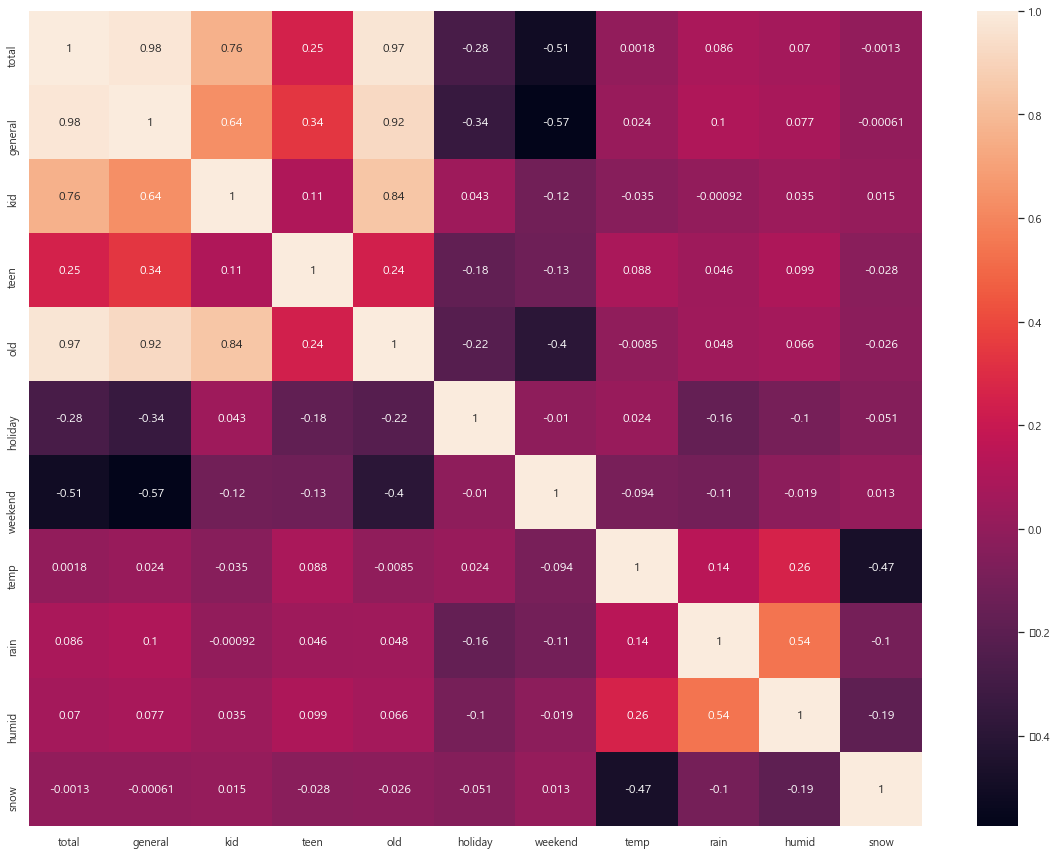

In [102]:
sns.set(rc={'figure.figsize':(20,15)})
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

corrMatrix = rain_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
#눈이나 비가 온 날짜만 가지고 상관계수 표 만듦

In [119]:
rain_df.to_csv("logRain_1.csv", index = False)